In [ ]:

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
import tensorflow_probability as tfp
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
#import data set
import numpy as np
mnist = tf.keras.datasets.mnist
import random
from tensorboard.plugins.hparams import api as hp
import datetime
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
from sklearn import ensemble
from sklearn import linear_model
import tensorflow as tf
import tensorflow_probability as tfp
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
#import data set
import numpy as np
mnist = tf.keras.datasets.mnist
import random
from sklearn.model_selection import train_test_split
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
tfd = tfp.distributions

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=10000)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)



import tensorflow as tf
import tensorflow_probability as tfp
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tensorboard.plugins.hparams import api as hp
import pandas as pd
#import data set
import numpy as np
mnist = tf.keras.datasets.mnist
import random
import datetime
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#import photoz data:
tfd = tfp.distributions
#from google.colab import files

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
#photozdata = pd.read_csv('~/Downloads/forced_forced2_spec_z_matched_online.csv')

#photozdata = pd.read_csv('~/Downloads/forced_forced2_spec_z_matched_online.csv')
photozdata = pd.read_csv('~/Downloads/trimmed_forced_forced2_spec_z_matched_online.csv')


filt = (photozdata['specz_redshift'] < 4) & (photozdata['specz_redshift'] > 0) & (photozdata['specz_redshift_err'] >0) \
       & (photozdata['specz_redshift_err'] < 1)
photozdata_subset = photozdata[filt]

photozdata = photozdata_subset
spectro_z = np.asarray(photozdata["specz_redshift"])
col1 = np.asarray(photozdata["g_cmodel_mag"])
col2 = np.asarray(photozdata["r_cmodel_mag"])
col3 = np.asarray(photozdata["i_cmodel_mag"])
col4 =np.asarray(photozdata["z_cmodel_mag"])
col5 = np.asarray(photozdata["y_cmodel_mag"])


photodata = {'col1':col1,
             'col2':col2,
             'col3':col3,
             'col4':col4,
             'col5':col5,
             'specz':spectro_z
}


df = pd.DataFrame(photodata)
photodata = df

photodata.replace(-99., np.nan, inplace=True)
photodata.replace(-99.9, np.nan, inplace=True)
photodata.replace(np.inf, np.nan, inplace=True)

spectro_z = photodata['specz']
photodata = photodata.drop("specz", axis=1)


#normalize
#photodata = min_max_scaler.fit_transform(photodata)



In [ ]:
!jupyter notebook --debug

[D 17:11:05.590 NotebookApp] Searching ['/home/ejones', '/home/ejones/.jupyter', '/opt/anaconda3/envs/jupyterhub/etc/jupyter', '/usr/local/etc/jupyter', '/etc/jupyter'] for config files
[D 17:11:05.590 NotebookApp] Looking for jupyter_config in /etc/jupyter
[D 17:11:05.590 NotebookApp] Looking for jupyter_config in /usr/local/etc/jupyter
[D 17:11:05.590 NotebookApp] Looking for jupyter_config in /opt/anaconda3/envs/jupyterhub/etc/jupyter
[D 17:11:05.590 NotebookApp] Loaded config file: /opt/anaconda3/envs/jupyterhub/etc/jupyter/jupyter_config.json
[D 17:11:05.590 NotebookApp] Looking for jupyter_config in /home/ejones/.jupyter
[D 17:11:05.590 NotebookApp] Looking for jupyter_config in /home/ejones
[D 17:11:05.592 NotebookApp] Looking for jupyter_notebook_config in /etc/jupyter
[D 17:11:05.592 NotebookApp] Looking for jupyter_notebook_config in /usr/local/etc/jupyter
[D 17:11:05.592 NotebookApp] Looking for jupyter_notebook_config in /opt/anaconda3/envs/jupyterhub/etc/jupyter
[D 17:11:0

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 500)          3000        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 500)          250500      dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 500)          250500      dense_1[0][0]                    
______________________________________________________________________________________________

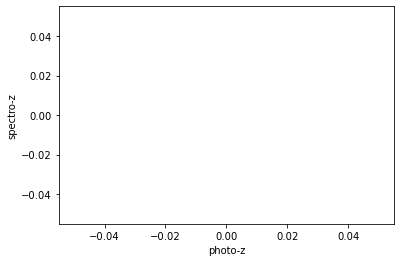

% correct:  0.0
number of outliers:  0  out of  114849
% of outliers:  0.0
number of catastrophic outliers:  0  out of  114849
% of catastrophic outliers:  0.0


In [ ]:


#bin the redshift:

bin_size = 0.1


x_train ,x_test,y_train,y_test = train_test_split(photodata,spectro_z,test_size=0.9)

y_train = np.array(y_train)
y_train = np.round(y_train/bin_size)
y_test = np.array(y_test)
y_test_original = y_test
y_test = np.round(y_test/bin_size)


x_train = np.array(x_train)

x_test = np.array(x_test)


#bin_size = 0.12
def random_gaussian_initializer(shape, dtype):
    n = int(shape / 2)
    loc_norm = tf.random_normal_initializer(mean=0., stddev=0.1)
    loc = tf.Variable(
        initial_value=loc_norm(shape=(n,), dtype=dtype)
    )
    scale_norm = tf.random_normal_initializer(mean=-3., stddev=0.1)
    scale = tf.Variable(
        initial_value=scale_norm(shape=(n,), dtype=dtype)
    )
    return tf.concat([loc, scale], 0)
def prior_trainable(kernel_size: int, bias_size: int, dtype: any) -> tf.keras.Model:
    """Specify the prior over `keras.layers.Dense` `kernel` and `bias`."""
    n = kernel_size + bias_size

    return tf.keras.Sequential([
        tfp.layers.VariableLayer(n, dtype=dtype),  # Returns a trainable variable of shape n, regardless of input
        tfp.layers.DistributionLambda(lambda t: tfd.Independent(
            tfd.Normal(loc=t, scale=1),
            reinterpreted_batch_ndims=1)),
    ])

def posterior_mean_field(kernel_size: int, bias_size: int, dtype: any) -> tf.keras.Model:
    """Specify the surrogate posterior over `keras.layers.Dense` `kernel` and `bias`."""
    n = kernel_size + bias_size
    c = np.log(np.expm1(1.))

    return tf.keras.Sequential([
        tfp.layers.VariableLayer(2 * n, dtype=dtype),
        tfp.layers.DistributionLambda(lambda t: tfd.Independent(
            tfd.Normal(loc=t[..., :n],
                       scale=1e-5 + 0.000001*tf.nn.softplus(c + t[..., n:])),
            reinterpreted_batch_ndims=1)),
    ])


def prior_trainable(kernel_size: int, bias_size: int, dtype: any) -> tf.keras.Model:
    """Specify the prior over `keras.layers.Dense` `kernel` and `bias`."""
    n = kernel_size + bias_size

    return tf.keras.Sequential([
        tfp.layers.VariableLayer(n, dtype=dtype),  # Returns a trainable variable of shape n, regardless of input
        tfp.layers.DistributionLambda(lambda t: tfd.Independent(
            tfd.Normal(loc=t, scale=1),
            reinterpreted_batch_ndims=1)),
    ])

def negative_loglikelihood(targets, estimated_distribution):
    return -estimated_distribution.log_prob(targets)

#network architecture
#relu stands for rectified linear - modern standard for general application, I think
# model = tf.keras.Sequential([
#     #tf.keras.layers.Conv2D(40,(3,3),activation='relu',input_shape=(5,)),
#     tfp.layers.DenseVariational(320,activation='relu', input_shape=(10,),
#                                 make_posterior_fn=posterior_mean_field,
#                                 make_prior_fn=prior_trainable),
#     tf.keras.layers.Dense(160, activation='relu'),
#     tf.keras.layers.Dense(160, activation='relu'),
#     tf.keras.layers.Dense(80,activation='softmax'),
# ])

# model = tf.keras.Sequential([
#     #tf.keras.layers.Conv2D(40,(3,3),activation='relu',input_shape=(5,)),
#     tfp.layers.DenseVariational(320,activation='relu', input_shape=(10,),
#                                 make_posterior_fn=posterior_mean_field,
#                                 make_prior_fn=prior_trainable),
#     tf.keras.layers.Dense(160, activation='relu'),
#     tf.keras.layers.Dense(160, activation='relu'),
#     tf.keras.layers.Dense(80,activation='softmax'),
#     tf.keras.layers.Concatenate()(),
#     tf.keras.layers.Dense(1),
# ])

# input_ = tf.keras.layers.Input(shape=x_train.shape[1:])
# hidden1 = tfp.layers.DenseVariational(50, activation='relu', input_shape=(5,),
#                                 make_posterior_fn=posterior_mean_field,
#                                 make_prior_fn=prior_trainable)(input_)
# hidden2 = tfp.layers.DenseVariational(50, activation='relu', input_shape=(5,),
#                                 make_posterior_fn=posterior_mean_field,
#                                 make_prior_fn=prior_trainable)(hidden1)
# hidden3 = tfp.layers.DenseVariational(50, activation='relu', input_shape=(5,),
#                                 make_posterior_fn=posterior_mean_field,
#                                 make_prior_fn=prior_trainable)(hidden2)
# hidden4 = tfp.layers.DenseVariational(50, activation='relu', input_shape=(5,),
#                                 make_posterior_fn=posterior_mean_field,
#                                 make_prior_fn=prior_trainable)(hidden3)
# concat = tf.keras.layers.Concatenate()([input_, hidden4])
# #output = tf.keras.layers.Dense(1)(concat)
# distribution_params = tf.keras.layers.Dense(units=2)(concat)
# output = tfp.layers.IndependentNormal(1)(distribution_params)
# model = tf.keras.Model(inputs=[input_], outputs=[output])

input_ = tf.keras.layers.Input(shape=x_train.shape[1:])
hidden1 = tf.keras.layers.Dense(500, activation="relu")(input_)
hidden2 = tf.keras.layers.Dense(500, activation="relu")(hidden1)
hidden3 = tf.keras.layers.Dense(500, activation="relu")(hidden2)
hidden4 = tf.keras.layers.Dense(500, activation="relu")(hidden3)
concat = tf.keras.layers.Concatenate()([input_, hidden4])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_], outputs=[output])



#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.compile(optimizer='adam', loss='mean_absolute_error',metrics=[tf.keras.metrics.MeanAbsoluteError()])

#model.compile(optimizer='adam', loss=negative_loglikelihood,metrics=[keras.metrics.RootMeanSquaredError()])

model.summary()

#history = model.fit(x_train,y_train,batch_size = 100, epochs=500,shuffle = True,verbose=1,validation_data=(x_test,y_test))
history = model.fit(x_train,y_train,batch_size=5000,epochs=25,shuffle = True,verbose=1,validation_data=(x_test,y_test))


predictions = model.predict(x_test)
np.argmax(predictions[0])
photoz = []
for i in range(0,len(y_test)):
    photoz.append(predictions[i]*bin_size)

plt.scatter(y_test_original,photoz)
#plt.title('Photo-z determination')
plt.ylabel('spectro-z')
plt.xlabel('photo-z')
plt.show()



num_correct = 0
outliers = []
outlier_index = []
cat_outlier_index = []
#y_test = y_test * bin_size
for i in range(0,len(y_test)):

    if abs(photoz[i] - (y_test[i])*bin_size) < 0.0001:

        num_correct = num_correct + 1

    outliers.append(abs(photoz[i] - y_test_original[i])/(1+y_test_original[i]))

    if outliers[i] > 0.15:
            outlier_index.append(i)


    if outliers[i] > 1:
            cat_outlier_index.append(i)



print("% correct: ", 100.0*num_correct/len(y_test))
print("number of outliers: ", len(outlier_index), " out of ", len(y_test))
print("% of outliers: ", 100.0*len(outlier_index)/len(y_test))
print("number of catastrophic outliers: ", len(cat_outlier_index), " out of ", len(y_test))
print("% of catastrophic outliers: ", len(cat_outlier_index)/len(y_test))

#calculate RMS error:
RMS_error = np.sqrt(np.sum(((abs(photoz - y_test_original)/(1+y_test_original))**2))/len(y_test))
squares = [x*x for x in outliers]
RMS_error_2 = np.sqrt(np.sum(squares)/len(y_test))
print("RMS error: ", RMS_error_2)

#calculating RMSE another way:
RMSE = mean_squared_error(y_test_original,photoz, squared = False)
print("RMS error = ", RMSE)
# ;  if plot EQ 1 then begin
# ;    plot, temporary(testredshift), temporary(output), psym = 1, XRANGE = [0, 4], YRANGE = [0,
#                                                                                             4], title = 'Photo-z vs Spectro-z', xtitle = 'spectroscopic redshift', ytitle = 'photo-z'
# ;    PLOTS, [.18, 1.6 * 2], [0, 1.2 * 2]
# ;    PLOTS, [0, 1.6 * 2], [.15, 2 * 2]
# ;  endif


plt.scatter(y_test_original,photoz, marker='+',color = 'black')
#plt.title('Photo-z determination')
plt.xlabel('spectroscopic redshift')
plt.ylabel('photo z')
plt.plot([.18,1.6*2.4],[0,1.2*2.4], color='black')
plt.plot([0, 1.6 * 2.4], [.15, 2 * 2.4],color = 'black')
plt.show()
